In [2]:

import easyocr
from PIL import Image
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv2 import dnn_superres
from pdf2image import convert_from_path
import tb.OcrToTableTool as ottt
import tb.TableExtractor as te
import tb.TableLinesRemover as tlr
import cv2
import ReadTable as rt

from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
# import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

/var/folders/lw/wtstv4c903z21m_kcl3szj_w0000gn/T/ipykernel_86824/2599531388.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [31]:
img = cv2.imread('figure/daily_0.jpg')

cv2.imshow('origin', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

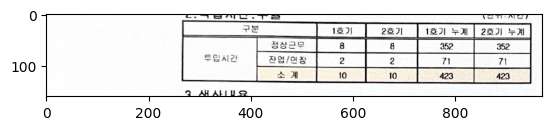

In [44]:
first = img[420:540, 150:2000]
second_1 = img[540:700, 150:1120]
second_2 = img[300:430, 850:1500]
third = img[435:790, 150:1500]
fourth = img[795:1080, 150:1500]
fifth = img[1085:2400, 150:1500]

def show_image(file_image):
    
    plt.imshow(file_image)
    plt.show()

    cv2.imshow('image', file_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return None

show_image(second_1)

In [45]:
# list_table = rt.ReadTable(path_to_image).execute()
table_extractor = te.TableExtractor(second_1)
perspective_corrected_image = table_extractor.execute()

lines_remover = tlr.TableLinesRemover(perspective_corrected_image)
image_without_lines = lines_remover.execute()

# cv2.imshow("image", list_table[0])
cv2.imshow("perspective_corrected_image", perspective_corrected_image)

cv2.imshow("image_without_lines", image_without_lines)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [71]:

reader = easyocr.Reader(['ko','en']) 
reader_eng = easyocr.Reader(['en'])


In [48]:
img = cv2.imread('figure/0.jpg')

# sr = cv2.dnn_superres.DnnSuperResImpl_create()
# sr.readModel('EDSR_x3.pb')
# sr.setModel('edsr',3)

# result = sr.upsample(img)


'''
## 따로 창 띄우기

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\n## 따로 창 띄우기\n\ncv2.imshow('image', img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

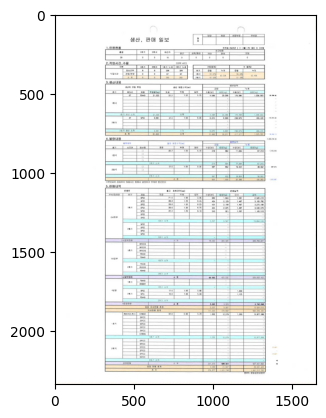

In [5]:
plt.imshow(img)
plt.show()

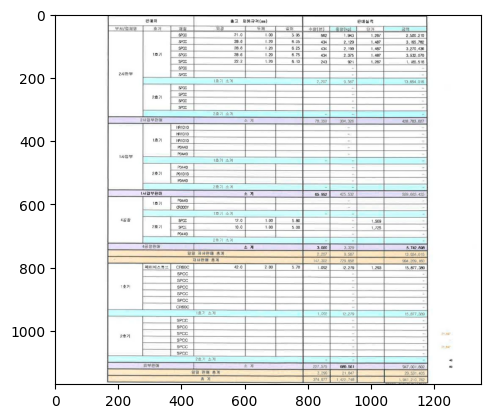

In [69]:
first = img[220:300, 150:1500]
second_1 = img[320:430, 160:850]
second_2 = img[300:430, 850:1500]
third = img[435:790, 150:1500]
fourth = img[795:1060, 150:1500]
fifth = img[1095:2265, 150:1500]

def show_image(file_image):
    
    plt.imshow(file_image)
    plt.show()

    cv2.imshow('image', file_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return None

show_image(fifth)

In [14]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel('EDSR_x2.pb')
sr.setModel('edsr',2)

result = sr.upsample(first)



In [15]:
cv2.imshow('original', first)
cv2.imshow('upsampling',result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
def convert_image_to_grayscale(self):
    self.grayscale_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

def threshold_image(self):
    self.thresholded_image = cv2.threshold(self.grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def invert_image(self):
    self.inverted_image = cv2.bitwise_not(self.thresholded_image)

def dilate_image(self):
    self.dilated_image = cv2.dilate(self.inverted_image, None, iterations=5)

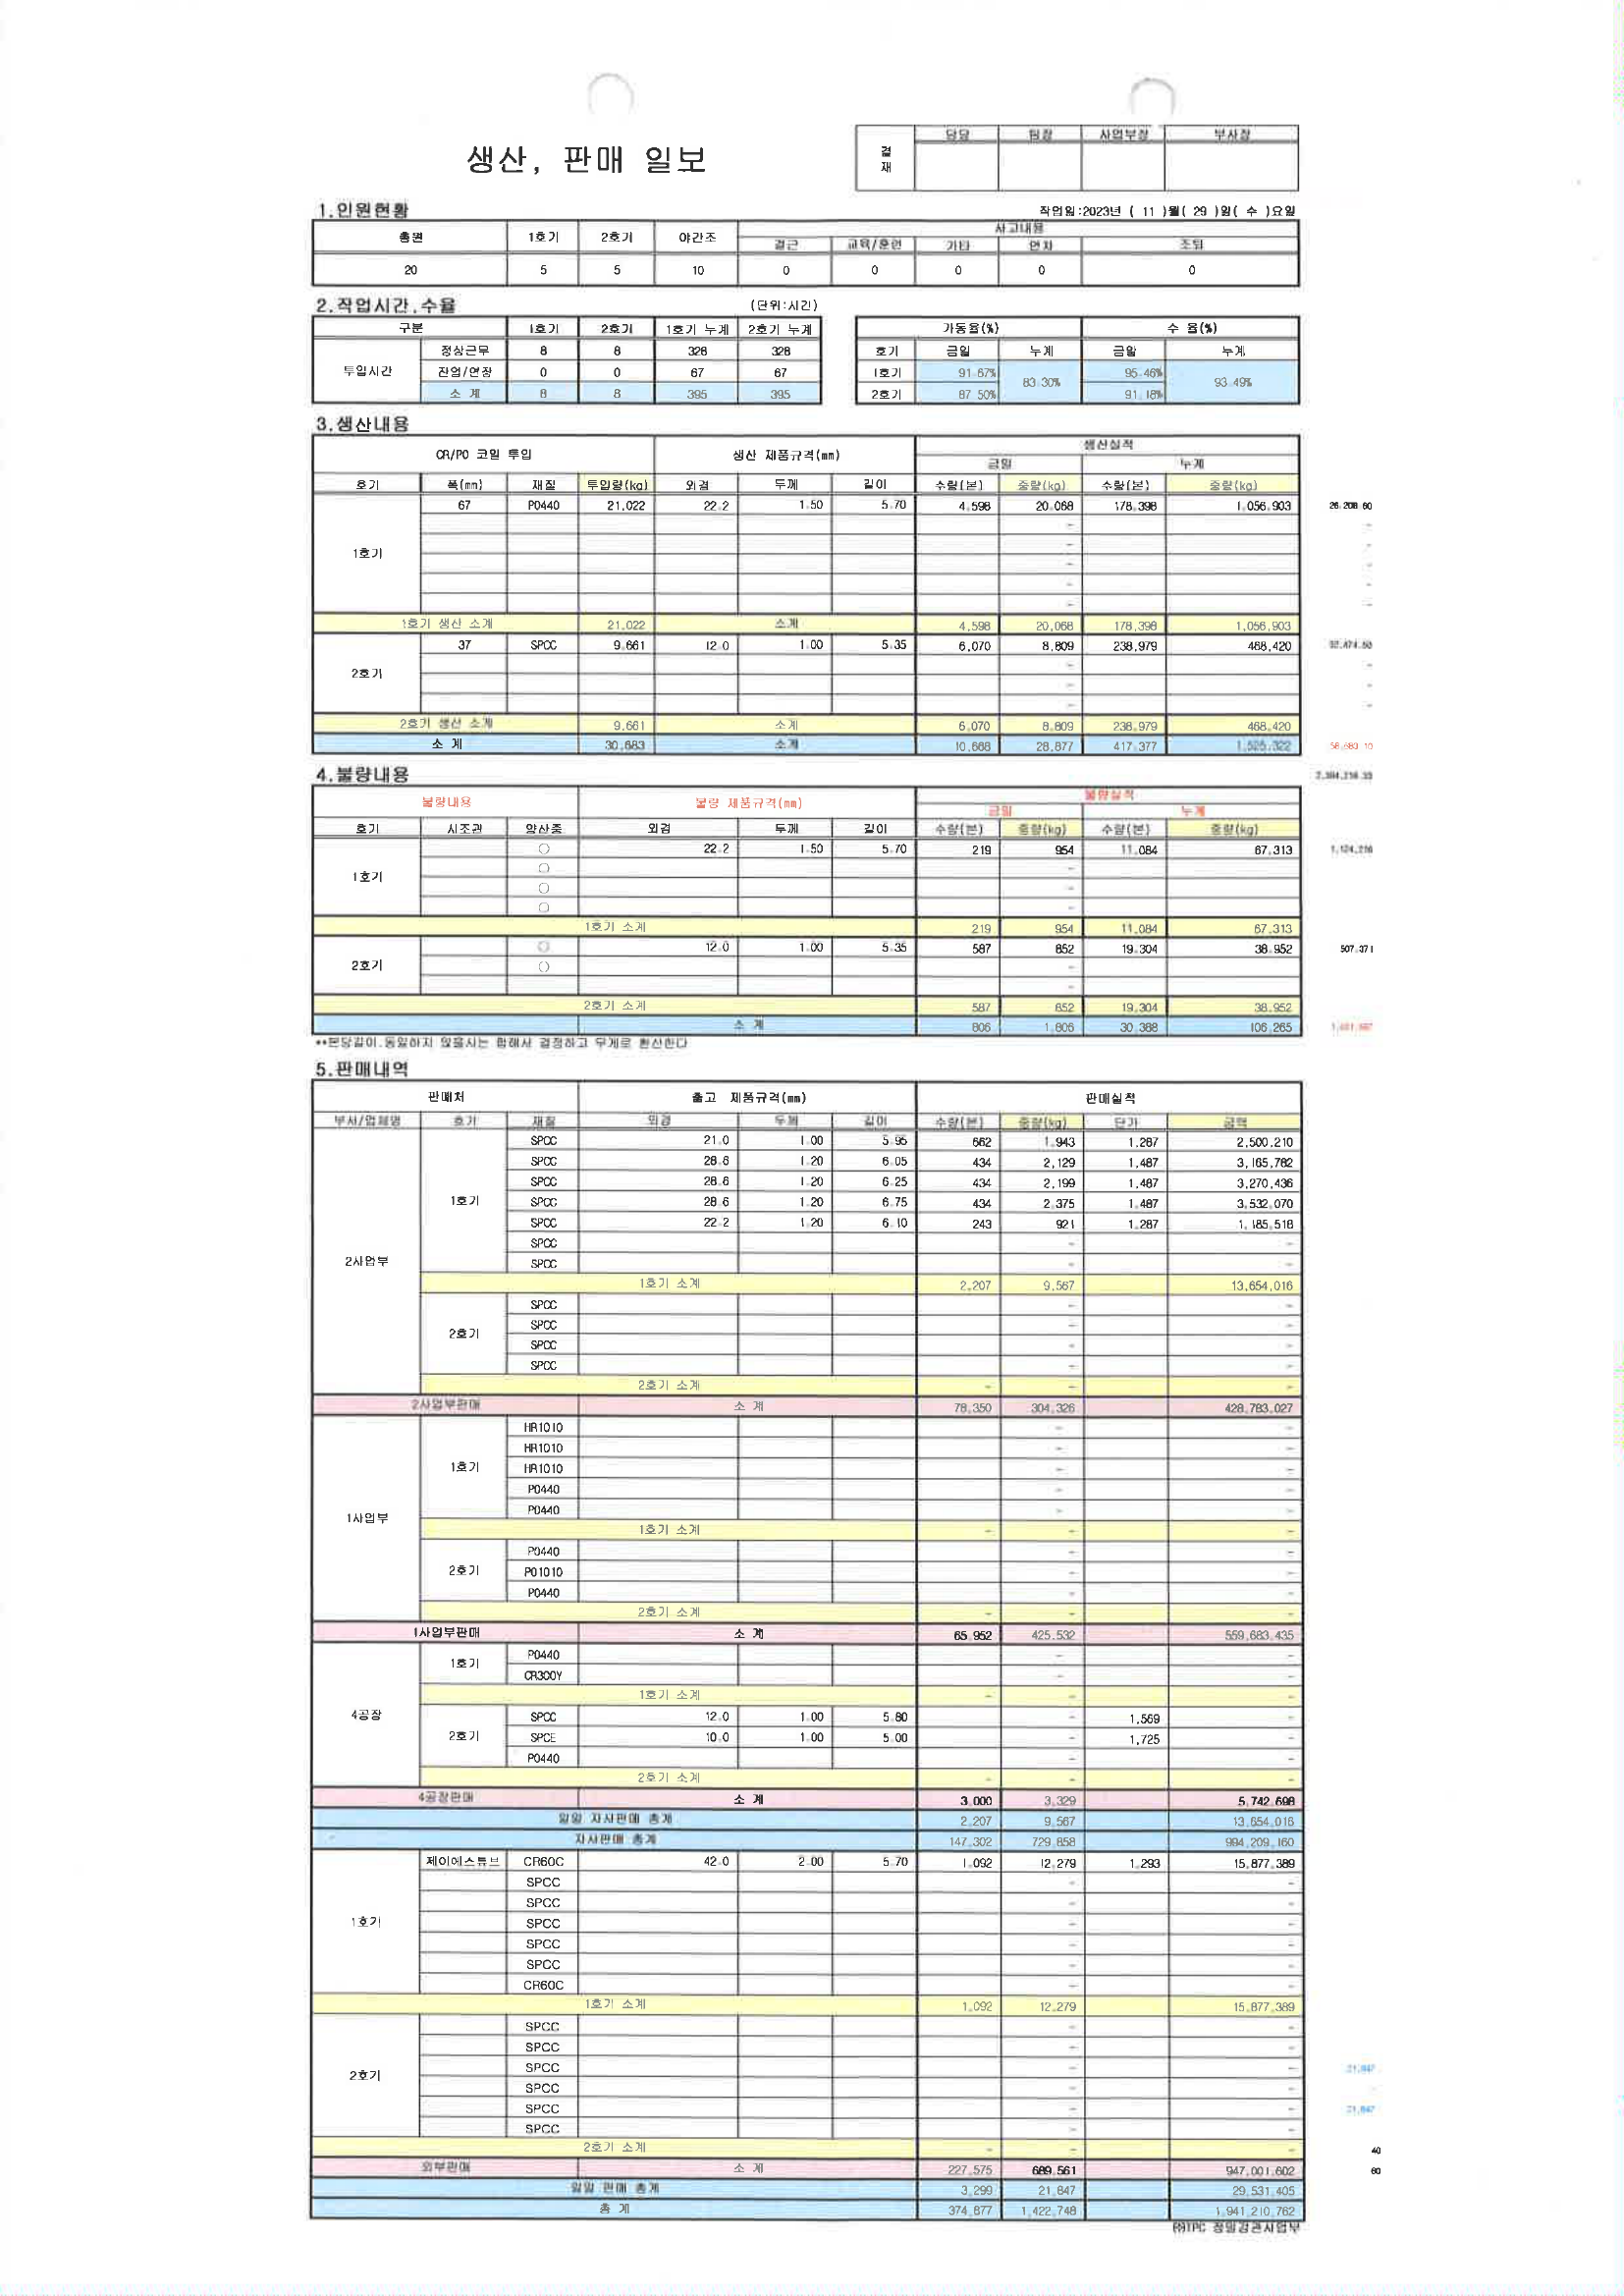

In [4]:
filename = '0.png'
img1 = Image.open(filename)
img1


In [76]:
# result = reader.readtext('tmp_figure/user_statuses.jpg')
reader = easyocr.Reader(['ko']) 

img = cv2.imread('tmp_figure/user_statuses.jpg')
result = reader.readtext(img)

result

[([[267, 15], [311, 15], [311, 35], [267, 35]], '18기', 0.19524521154834865),
 ([[355, 15], [399, 15], [399, 35], [355, 35]], '2.기', 0.5191322071449073),
 ([[451, 15], [501, 15], [501, 35], [451, 35]], '야간조', 0.9958386634824715)]

In [38]:
unit_1st_input = [617, 509]
unit_1st_weight = [1053, 509]
unit_1st_sum = [1269, 509]
unit_2nd_input = [623, 651]
unit_2nd_weight = [1059, 733]
unit_2nd_sum = [1269, 733]

result[1][0][0] == [567, 143]

df = pd.DataFrame(columns=['1호기 투입량', '1호기 금일 중량', '1호기 누계 중량', '2호기 투입량','2호기 금일 중량','2호기 누계 중량'])

for i in result: 
    if i[0][0] == unit_1st_input:
        val_unit_1st_input=i[1]
    if i[0][0] == unit_1st_weight:
        val_unit_1st_weight=i[1]
    if i[0][0] == unit_1st_sum:
        val_unit_1st_sum=i[1]
    if i[0][0] == unit_2nd_input:
        val_unit_2nd_input=i[1]
    if i[0][0] == unit_2nd_weight:
        val_unit_2nd_weight=i[1]
    if i[0][0] == unit_2nd_sum:
        val_unit_2nd_sum=i[1]

df_1 = pd.DataFrame({'1호기 투입량': val_unit_1st_input, '1호기 금일 중량':val_unit_1st_weight, '1호기 누계 중량':val_unit_1st_sum, '2호기 투입량':val_unit_2nd_input,'2호기 금일 중량':val_unit_2nd_weight,'2호기 누계 중량':val_unit_2nd_sum}, index=[0])

df = pd.concat([df,df_1])
df
    
    

,1호기 투입량,1호기 금일 중량,1호기 누계 중량,2호기 투입량,2호기 금일 중량,2호기 누계 중량
0,21 022,2 O69,058 93,9 6f1,8 BDg,468 420


In [38]:
corp_image = img1.crop((1126,1170,1164,1196))

corp_image = corp_image.resize((250,250))
corp_image.show()
corp_image.save('./recent.png')

result = reader.readtext('recent.png')
result
# [1126, 1170], [1164, 1170], [1164, 1196], [1126, 1196]

[([[23, 13], [233, 13], [233, 217], [23, 217]], '9', 0.07717358164885368)]

# PDF to Image

In [34]:
from pdf2image import convert_from_path

images = convert_from_path('./figure/daily.pdf')
for i, page in enumerate(images):
    page.save(f"./figure/daily_{str(i)}.jpg", "JPEG")
    
    

In [21]:

for i, page in enumerate(images):
    page.save(f"./{str(i)}.png", "PNG")
    


# PDF to Docs

In [41]:
from pdf2docx import Converter

pdf_file = './data.pdf'
docx_file = './sample.docx'

# convert pdf to docx
cv = Converter(pdf_file)
cv.convert(docx_file)      # all pages by default
cv.close()

[INFO] Start to convert ./data.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[WARNING] Words count: 0. It might be a scanned pdf, which is not supported yet.
[INFO] [3/4] Parsing pages...
[INFO] (1/9) Page 1
[INFO] (2/9) Page 2
[INFO] (3/9) Page 3
[INFO] (4/9) Page 4
[INFO] (5/9) Page 5
[INFO] (6/9) Page 6
[INFO] (7/9) Page 7
[INFO] (8/9) Page 8
[INFO] (9/9) Page 9
[INFO] [4/4] Creating pages...
[INFO] (1/9) Page 1
[INFO] (2/9) Page 2
[INFO] (3/9) Page 3
[INFO] (4/9) Page 4
[INFO] (5/9) Page 5
[INFO] (6/9) Page 6
[INFO] (7/9) Page 7
[INFO] (8/9) Page 8
[INFO] (9/9) Page 9
[INFO] Terminated in 4.82s.


In [80]:
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
  image_list_title = []
  image_list = []

  org_image = image.copy()
  image = imutils.resize(image, width=width)
  ratio = org_image.shape[1] / float(image.shape[1])

  # 이미지를 grayscale로 변환하고 blur를 적용
  # 모서리를 찾기위한 이미지 연산
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, ksize, 0)
  edged = cv2.Canny(blurred, min_threshold, max_threshold)

  image_list_title = ['gray', 'blurred', 'edged']
  image_list = [gray, blurred, edged]

  # contours를 찾아 크기순으로 정렬
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

  findCnt = None

  # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영역으로 판단하고 break
    if len(approx) == 4:
      findCnt = approx
      break


  # 만약 추출한 윤곽이 없을 경우 오류
  if findCnt is None:
    raise Exception(("Could not find outline."))


  output = image.copy()
  cv2.drawContours(output, [findCnt], -1, (0, 255, 0), 2)
  
  image_list_title.append("Outline")
  image_list.append(output)

  # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
  transform_image = four_point_transform(org_image, findCnt.reshape(4, 2) * ratio)

  plt_imshow(image_list_title, image_list)
  plt_imshow("Transform", transform_image)

  return transform_image

In [83]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

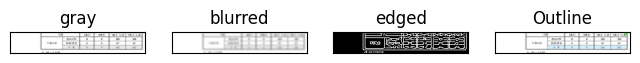

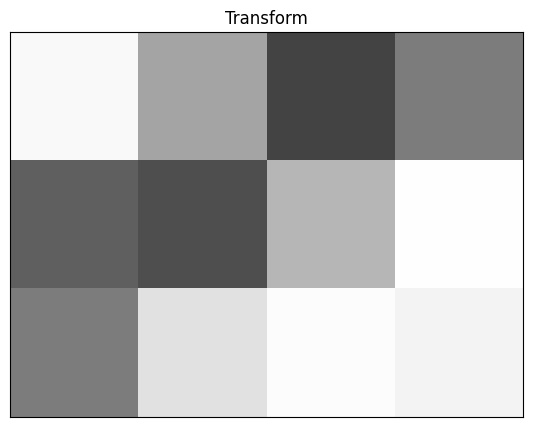

In [86]:
receipt_image = make_scan_image(second_1, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)

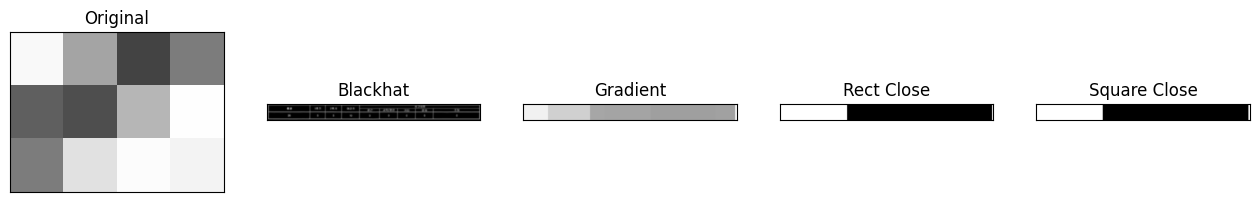

In [104]:
img = cv2.imread('./tmp_figure/user_statuses.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(H, W) = gray.shape

rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (255, 255))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (255, 255))

gray = cv2.GaussianBlur(gray, (11, 11), 0)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

grad = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")

grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

close_thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
close_thresh = cv2.erode(close_thresh, None, iterations=2)

plt_imshow(["Original", "Blackhat", "Gradient", "Rect Close", "Square Close"], [receipt_image, blackhat, grad, thresh, close_thresh], figsize=(16, 10))

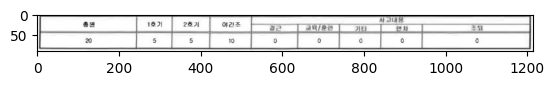

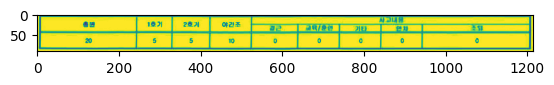

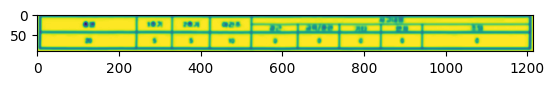

In [95]:
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

gray = cv2.GaussianBlur(gray, (11, 11), 0)

plt.imshow(gray)
plt.show()


In [5]:
img = cv2.imread('./tmp_figure/user_statuses.jpg')


gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(gray_scale, 150, 225, cv2.THRESH_BINARY)
img_bin =~ img_bin

# plt.imshow(~img_bin)
# plt.show()

line_min_width = 15
kernal_h = np.ones((1, line_min_width), np.uint8)
kernal_v = np.ones(( line_min_width,1), np.uint8)

img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

img_bin_final = img_bin_h | img_bin_v 

# plt.imshow(img_bin_final)
# plt.show()


In [6]:
final_kernel = np.ones((3,3),np.uint8)
img_bin_final = cv2.dilate(img_bin_final, final_kernel, iterations=1)


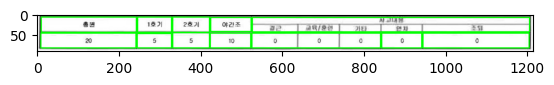

In [10]:
_, labels, stats, _ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
n1 = np.array(stats[2:])

for x,y,w,h,area in stats[2:]:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    
    if w and h:
        roi = img[y:y+h, x:x+w]
        # cv2.imshow('cropped', roi)                   # ROI 지정 영역을 새창으로 표시
        # cv2.moveWindow('cropped', 0, 0)              # 새창을 화면 측 상단으로 이동
        # cv2.imwrite('../CV2/img/cropped2.jpg', roi)  # ROI 영역만 파일로 저장
    cv2.imshow('img', roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))
plt.show()


In [131]:
stats[2:]

array([[   10,     7,   233,    37,  8255],
       [  246,     7,    83,    37,  3046],
       [  332,     7,    90,    37,  3129],
       [  425,     8,    99,    34,  3345],
       [  527,     8,   679,    35, 23020],
       [  332,    45,    90,    37,  3090],
       [    9,    46,   233,    36,  7950],
       [  245,    47,    84,    35,  2815],
       [  424,    46,    99,    36,  3539],
       [  526,    46,   315,    36, 10948],
       [  844,    46,    98,    36,  3431],
       [  945,    46,   260,    36,  9116]], dtype=int32)

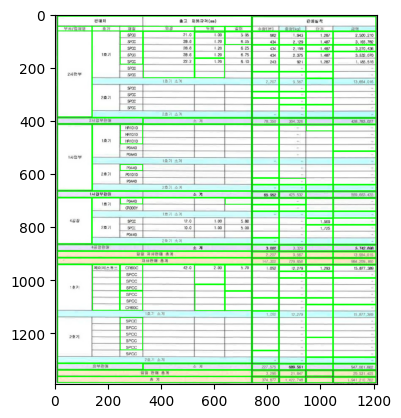

array([[    10,      8,    728,     55,  29515],
       [   743,     10,    463,     53,  24153],
       [    10,     46,    128,    340,  43205],
       [   140,     46,    598,    342, 115994],
       [   526,     47,    111,     17,   1825],
       [   640,     47,     98,     17,   1592],
       [   245,     65,     84,    123,   9825],
       [   332,     65,    191,    174,  30834],
       [   640,     67,     98,     47,   4503],
       [   743,     66,     98,     48,   4583],
       [   844,     66,     98,     48,   4704],
       [   945,     66,     99,     48,   4597],
       [  1047,     66,    159,     48,   6927],
       [   526,     68,    111,     96,  10111],
       [   743,    117,     98,     98,   9558],
       [   844,    117,     98,     98,   9334],
       [   945,    117,     98,     22,   2156],
       [  1047,    117,    159,     22,   3498],
       [   945,    142,     99,     73,   7058],
       [  1047,    142,    159,    246,  36875],
       [   526,    1

In [192]:
img = cv2.imread('./tmp_figure/sale_context.jpg')


gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(gray_scale, 150, 225, cv2.THRESH_BINARY)
img_bin =~ img_bin

line_min_width = 15
kernal_h = np.ones((1, line_min_width), np.uint8)
kernal_v = np.ones(( line_min_width,1), np.uint8)

img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

img_bin_final = img_bin_h | img_bin_v 

final_kernel = np.ones((3,3),np.uint8)
img_bin_final = cv2.dilate(img_bin_final, final_kernel, iterations=1)

_, labels, stats, _ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)
n1 = np.array(stats[2:])
i = 0
for x,y,w,h,area in stats[2:]:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    i += 1
    if w and h:
        roi = img[y:y+h, x:x+w]
        # cv2.imshow('cropped', roi)                   # ROI 지정 영역을 새창으로 표시
        # cv2.moveWindow('cropped', 0, 0)              # 새창을 화면 측 상단으로 이동
        # cv2.imwrite('../CV2/img/cropped2.jpg', roi)  # ROI 영역만 파일로 저장
    cv2.imshow(f'img_{i}', roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))
plt.show()

stats[2:]

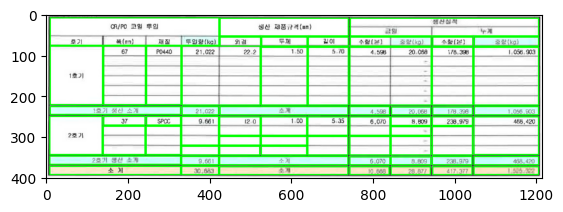

array([[   10,     9,   413,    67, 26360],
       [  426,    10,   314,    43, 13496],
       [  745,    10,   461,    43, 19440],
       [  426,    56,    99,    22,  1977],
       [  528,    56,   111,    22,  2442],
       [  642,    56,    98,    22,  2156],
       [  745,    56,   198,    22,  4267],
       [  947,    56,    98,    22,  2098],
       [ 1049,    56,   157,    22,  3298],
       [   10,    78,   128,   143, 18161],
       [  141,    78,   102,   143, 14268],
       [  246,    78,    84,   143, 11724],
       [  333,    78,   191,   144, 25584],
       [  527,    81,   112,   141, 15117],
       [  642,    81,    98,   141, 13322],
       [  744,    81,   199,   141, 26598],
       [  946,    81,    99,   141, 13171],
       [ 1048,    81,   158,   141, 21482],
       [   10,   226,   319,    19,  6061],
       [  333,   226,    89,    20,  1749],
       [  426,   226,   313,    20,  6115],
       [  744,   226,    97,    20,  1844],
       [  846,   227,    96,    

In [71]:
plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))
plt.show()

stats[2:]

In [187]:
stats[2:][13]

array([  526,    68,   111,    96, 10111], dtype=int32)

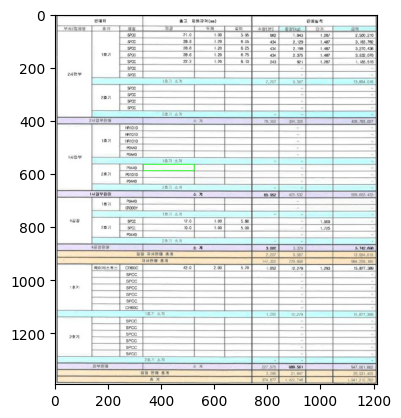

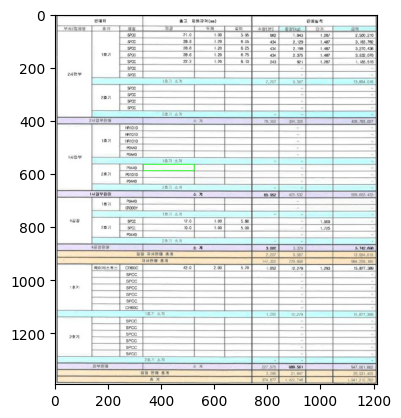

In [208]:
img = cv2.imread('./tmp_figure/user_statuses.jpg')
x,y,w,h = 245, 47, 84, 35
img[y:y+h, x:x+w]

plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))
plt.show()

plt.imshow(img)
plt.show()

In [213]:
img = cv2.imread('./tmp_figure/user_statuses.jpg')
# x,y,w,h = 332, 45, 90, 37
# img = img[y:y+h, x:x+w]

reader = easyocr.Reader(['ko','en']) 

result = reader.readtext(img, detail=0 )

print(result)

['18기', '2.기', '야간조']
